1. Proper Intialization of Weight
2. Batch Normalization
3. Choosing Less saturated Activstion Function(Relu, Elu)
4. Best Optimizer (ADAM)
5. Dropout (Overfitting)

In [135]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Label =  5


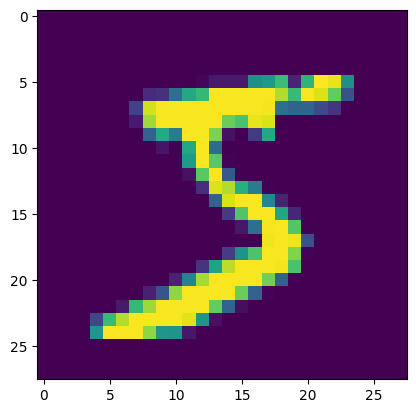

In [10]:
plt.imshow(x_train[0])
print("Label = ",y_train[0])

In [ ]:
for i in range(32,40):
  plt.imshow(x_train[i])
  plt.show()
  print("Label = ",y_train[i])

In [14]:
28*28

784

In [ ]:
1 2 3
4 5 6
7 8 9


1 2 3 4 5 6 7 8 9

In [22]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [23]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [24]:
a.shape

(3, 3)

In [25]:
a.reshape(9)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]).shape

(60000, 784)

In [27]:
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)

In [30]:
X_train,X_train.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 (60000, 784))

In [31]:
X_test, X_test.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 (10000, 784))

In [35]:
a = np.array([[[1,2,3],[4,5,6]],[[4,6,4],[7,89,9]]])
a.shape

(2, 2, 3)

In [39]:
Y_train = to_categorical(y_train )
Y_test = to_categorical(y_test )

In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [68]:
model = Sequential()

In [69]:
model.add(Dense(32, input_shape = (X_train.shape[1],), activation = 'sigmoid'))
model.add(Dense(16, activation = 'sigmoid'))
model.add(Dense(8, activation = 'sigmoid'))
model.add(Dense(4, activation = 'sigmoid'))
model.add(Dense(2, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [70]:
optim = SGD()
model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                25120     
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 4)                 36        
                                                                 
 dense_28 (Dense)            (None, 2)                 10        
                                                                 
 dense_29 (Dense)            (None, 10)                30        
                                                                 
Total params: 25860 (101.02 KB)
Trainable params: 2586

In [72]:
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 100, verbose = 2, validation_data= (X_test,Y_test))

Epoch 1/25
600/600 - 3s - loss: 0.6846 - accuracy: 0.1044 - val_loss: 0.6179 - val_accuracy: 0.1028 - 3s/epoch - 5ms/step
Epoch 2/25
600/600 - 3s - loss: 0.5697 - accuracy: 0.1044 - val_loss: 0.5280 - val_accuracy: 0.1028 - 3s/epoch - 4ms/step
Epoch 3/25
600/600 - 2s - loss: 0.4963 - accuracy: 0.1044 - val_loss: 0.4684 - val_accuracy: 0.1028 - 2s/epoch - 4ms/step
Epoch 4/25
600/600 - 2s - loss: 0.4465 - accuracy: 0.1044 - val_loss: 0.4272 - val_accuracy: 0.1028 - 2s/epoch - 3ms/step
Epoch 5/25
600/600 - 2s - loss: 0.4120 - accuracy: 0.1044 - val_loss: 0.3985 - val_accuracy: 0.1028 - 2s/epoch - 3ms/step
Epoch 6/25
600/600 - 2s - loss: 0.3877 - accuracy: 0.1044 - val_loss: 0.3782 - val_accuracy: 0.1028 - 2s/epoch - 3ms/step
Epoch 7/25
600/600 - 2s - loss: 0.3706 - accuracy: 0.1044 - val_loss: 0.3639 - val_accuracy: 0.1028 - 2s/epoch - 3ms/step
Epoch 8/25
600/600 - 2s - loss: 0.3584 - accuracy: 0.1044 - val_loss: 0.3536 - val_accuracy: 0.1028 - 2s/epoch - 4ms/step
Epoch 9/25
600/600 - 3s 

In [73]:
history.history

{'loss': [0.6845902800559998,
  0.5696660280227661,
  0.4962502717971802,
  0.4465194344520569,
  0.41196805238723755,
  0.387722373008728,
  0.3706071674823761,
  0.35844382643699646,
  0.3497289717197418,
  0.3434275984764099,
  0.33882877230644226,
  0.3354419469833374,
  0.33292680978775024,
  0.33104509115219116,
  0.3296276330947876,
  0.32855290174484253,
  0.32773393392562866,
  0.32710668444633484,
  0.3266241252422333,
  0.32625147700309753,
  0.32596278190612793,
  0.3257388472557068,
  0.3255639374256134,
  0.3254273533821106,
  0.3253202736377716],
 'accuracy': [0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10441666841506958,
  0.10

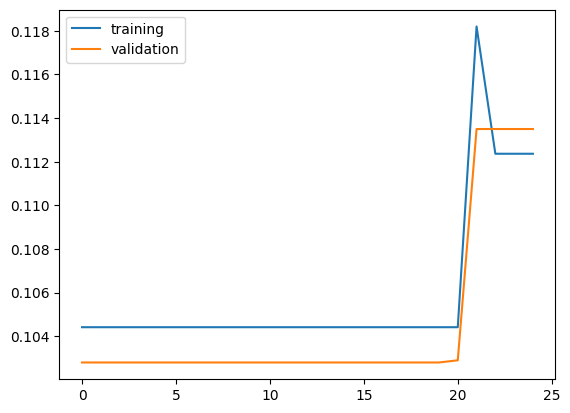

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [75]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3253 - accuracy: 0.1124


[0.32527419924736023, 0.11236666887998581]

In [76]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3253 - accuracy: 0.1135


[0.3252674639225006, 0.11349999904632568]

# 1. Proper Initialization of Weights

In [85]:
model = Sequential()

In [78]:
model.add(Dense(32, input_shape = (X_train.shape[1],), kernel_initializer = 'he_normal' ,activation = 'sigmoid'))
model.add(Dense(16,  kernel_initializer = 'he_normal', activation = 'sigmoid'))
model.add(Dense(8, kernel_initializer = 'he_normal' ,activation = 'sigmoid'))
model.add(Dense(4, kernel_initializer = 'he_normal' ,activation = 'sigmoid'))
model.add(Dense(2, kernel_initializer = 'he_normal' ,activation = 'sigmoid'))
model.add(Dense(10, kernel_initializer = 'he_normal' ,activation = 'softmax'))

In [79]:
optim = SGD()
model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                25120     
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                                 
 dense_33 (Dense)            (None, 4)                 36        
                                                                 
 dense_34 (Dense)            (None, 2)                 10        
                                                                 
 dense_35 (Dense)            (None, 10)                30        
                                                                 
Total params: 25860 (101.02 KB)
Trainable params: 2586

In [81]:
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 100, verbose = 2, validation_data= (X_test,Y_test))

Epoch 1/25
600/600 - 3s - loss: 0.5343 - accuracy: 0.0992 - val_loss: 0.4860 - val_accuracy: 0.1009 - 3s/epoch - 5ms/step
Epoch 2/25
600/600 - 2s - loss: 0.4543 - accuracy: 0.0992 - val_loss: 0.4270 - val_accuracy: 0.1009 - 2s/epoch - 3ms/step
Epoch 3/25
600/600 - 2s - loss: 0.4087 - accuracy: 0.0992 - val_loss: 0.3924 - val_accuracy: 0.1009 - 2s/epoch - 3ms/step
Epoch 4/25
600/600 - 2s - loss: 0.3812 - accuracy: 0.0992 - val_loss: 0.3710 - val_accuracy: 0.1009 - 2s/epoch - 3ms/step
Epoch 5/25
600/600 - 2s - loss: 0.3639 - accuracy: 0.0992 - val_loss: 0.3572 - val_accuracy: 0.1009 - 2s/epoch - 4ms/step
Epoch 6/25
600/600 - 3s - loss: 0.3526 - accuracy: 0.0992 - val_loss: 0.3481 - val_accuracy: 0.1009 - 3s/epoch - 4ms/step
Epoch 7/25
600/600 - 2s - loss: 0.3450 - accuracy: 0.0992 - val_loss: 0.3418 - val_accuracy: 0.1009 - 2s/epoch - 3ms/step
Epoch 8/25
600/600 - 2s - loss: 0.3396 - accuracy: 0.0992 - val_loss: 0.3374 - val_accuracy: 0.1009 - 2s/epoch - 3ms/step
Epoch 9/25
600/600 - 2s 

In [82]:
history.history

{'loss': [0.5343465209007263,
  0.45429956912994385,
  0.4086919128894806,
  0.3812364339828491,
  0.3639377951622009,
  0.35260990262031555,
  0.3449524939060211,
  0.3396376967430115,
  0.33586904406547546,
  0.33314821124076843,
  0.3311549127101898,
  0.3296761214733124,
  0.3285674750804901,
  0.32772812247276306,
  0.3270877003669739,
  0.32659634947776794,
  0.32621636986732483,
  0.32592135667800903,
  0.3256910741329193,
  0.3255103826522827,
  0.3253682255744934,
  0.32525619864463806,
  0.3251669704914093,
  0.32509636878967285,
  0.3250396251678467],
 'accuracy': [0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09915000200271606,
  0.09916666895151138,
  0.10491666942834854,
  0.12451666593551636,
  0.11243333667516708,
  0.11236666887998581,
  0.1

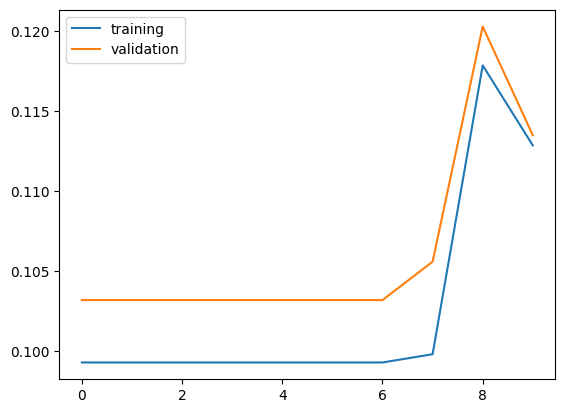

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [83]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3250 - accuracy: 0.1124


[0.32501429319381714, 0.11236666887998581]

In [84]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.1135


[0.32496702671051025, 0.11349999904632568]

# 2. Non saturating Activation Function

In [105]:
model = Sequential()

In [106]:
model.add(Dense(32, input_shape = (X_train.shape[1],),activation = 'elu'))
model.add(Dense(16,  activation = 'elu'))
model.add(Dense(8 ,activation = 'elu'))
model.add(Dense(4 ,activation = 'elu'))
model.add(Dense(2 ,activation = 'elu'))
model.add(Dense(10 ,activation = 'softmax'))

In [107]:
optim = SGD()
model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [108]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                25120     
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dense_50 (Dense)            (None, 8)                 136       
                                                                 
 dense_51 (Dense)            (None, 4)                 36        
                                                                 
 dense_52 (Dense)            (None, 2)                 10        
                                                                 
 dense_53 (Dense)            (None, 10)                30        
                                                                 
Total params: 25860 (101.02 KB)
Trainable params: 258

In [110]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 10, verbose = 2, validation_split = 0.4)

Epoch 1/10
3600/3600 - 13s - loss: 0.3249 - accuracy: 0.1142 - val_loss: 0.3249 - val_accuracy: 0.1135 - 13s/epoch - 4ms/step
Epoch 2/10
3600/3600 - 12s - loss: 0.3249 - accuracy: 0.1142 - val_loss: 0.3249 - val_accuracy: 0.1135 - 12s/epoch - 3ms/step
Epoch 3/10
3600/3600 - 12s - loss: 0.3249 - accuracy: 0.1142 - val_loss: 0.3249 - val_accuracy: 0.1135 - 12s/epoch - 3ms/step
Epoch 4/10
3600/3600 - 12s - loss: 0.3249 - accuracy: 0.1142 - val_loss: 0.3249 - val_accuracy: 0.1135 - 12s/epoch - 3ms/step
Epoch 5/10
3600/3600 - 13s - loss: 0.3249 - accuracy: 0.1142 - val_loss: 0.3249 - val_accuracy: 0.1135 - 13s/epoch - 4ms/step
Epoch 6/10
3600/3600 - 13s - loss: 0.3249 - accuracy: 0.1142 - val_loss: 0.3249 - val_accuracy: 0.1135 - 13s/epoch - 4ms/step
Epoch 7/10
3600/3600 - 12s - loss: 0.3249 - accuracy: 0.1142 - val_loss: 0.3249 - val_accuracy: 0.1135 - 12s/epoch - 3ms/step
Epoch 8/10
3600/3600 - 13s - loss: 0.3249 - accuracy: 0.1142 - val_loss: 0.3249 - val_accuracy: 0.1135 - 13s/epoch - 4

In [112]:
history.history

{'loss': [0.32493650913238525,
  0.3249386250972748,
  0.3249399960041046,
  0.3249286413192749,
  0.324935644865036,
  0.3249266445636749,
  0.3249283730983734,
  0.32493826746940613,
  0.3249303698539734,
  0.32492804527282715],
 'accuracy': [0.11424999684095383,
  0.11424999684095383,
  0.11424999684095383,
  0.11424999684095383,
  0.11424999684095383,
  0.11424999684095383,
  0.11424999684095383,
  0.11424999684095383,
  0.11424999684095383,
  0.11424999684095383],
 'val_loss': [0.3249163031578064,
  0.3249109983444214,
  0.32490307092666626,
  0.324945330619812,
  0.324916273355484,
  0.32490843534469604,
  0.3249254524707794,
  0.3249262273311615,
  0.32493650913238525,
  0.3249228894710541],
 'val_accuracy': [0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568]}

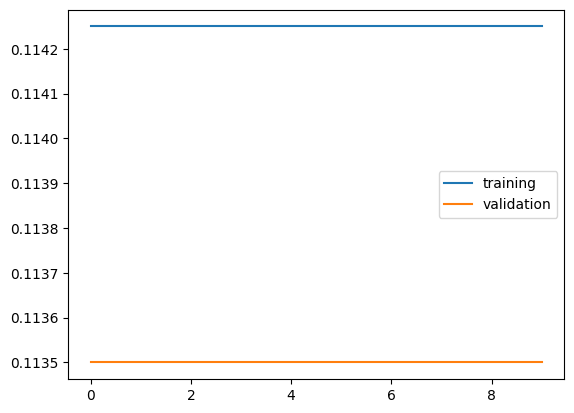

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [114]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3250 - accuracy: 0.1124


[0.3249545395374298, 0.11236666887998581]

In [115]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3249 - accuracy: 0.1135


[0.3249230980873108, 0.11349999904632568]

# 3. Best Optimizers

In [116]:
model = Sequential()

In [117]:
model.add(Dense(32, input_shape = (X_train.shape[1],),activation = 'elu'))
model.add(Dense(16,  activation = 'elu'))
model.add(Dense(8 ,activation = 'elu'))
model.add(Dense(4 ,activation = 'elu'))
model.add(Dense(2 ,activation = 'elu'))
model.add(Dense(10 ,activation = 'softmax'))

In [118]:
optim = Adam()
model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [119]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 32)                25120     
                                                                 
 dense_55 (Dense)            (None, 16)                528       
                                                                 
 dense_56 (Dense)            (None, 8)                 136       
                                                                 
 dense_57 (Dense)            (None, 4)                 36        
                                                                 
 dense_58 (Dense)            (None, 2)                 10        
                                                                 
 dense_59 (Dense)            (None, 10)                30        
                                                                 
Total params: 25860 (101.02 KB)
Trainable params: 258

In [120]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 10, verbose = 2, validation_split = 0.4)

Epoch 1/10
3600/3600 - 18s - loss: 0.3479 - accuracy: 0.1927 - val_loss: 0.2853 - val_accuracy: 0.2908 - 18s/epoch - 5ms/step
Epoch 2/10
3600/3600 - 16s - loss: 0.2632 - accuracy: 0.3718 - val_loss: 0.2531 - val_accuracy: 0.3877 - 16s/epoch - 4ms/step
Epoch 3/10
3600/3600 - 15s - loss: 0.2494 - accuracy: 0.3927 - val_loss: 0.2486 - val_accuracy: 0.3918 - 15s/epoch - 4ms/step
Epoch 4/10
3600/3600 - 22s - loss: 0.2456 - accuracy: 0.3948 - val_loss: 0.2485 - val_accuracy: 0.3955 - 22s/epoch - 6ms/step
Epoch 5/10
3600/3600 - 18s - loss: 0.2418 - accuracy: 0.3981 - val_loss: 0.2471 - val_accuracy: 0.3960 - 18s/epoch - 5ms/step
Epoch 6/10
3600/3600 - 15s - loss: 0.2407 - accuracy: 0.3983 - val_loss: 0.2485 - val_accuracy: 0.3982 - 15s/epoch - 4ms/step
Epoch 7/10
3600/3600 - 21s - loss: 0.2420 - accuracy: 0.4003 - val_loss: 0.2475 - val_accuracy: 0.3940 - 21s/epoch - 6ms/step
Epoch 8/10
3600/3600 - 21s - loss: 0.2416 - accuracy: 0.4008 - val_loss: 0.2524 - val_accuracy: 0.3973 - 21s/epoch - 6

In [122]:
history.history

{'loss': [0.3479008078575134,
  0.26322272419929504,
  0.2494017481803894,
  0.24555885791778564,
  0.24175558984279633,
  0.2406967431306839,
  0.24200493097305298,
  0.2416423112154007,
  0.2389335334300995,
  0.23779842257499695],
 'accuracy': [0.19272221624851227,
  0.37183332443237305,
  0.3926944434642792,
  0.394777774810791,
  0.3981388807296753,
  0.398250013589859,
  0.4002777636051178,
  0.4008055627346039,
  0.4039166569709778,
  0.4032222330570221],
 'val_loss': [0.2853088974952698,
  0.2531398832798004,
  0.24859479069709778,
  0.24853388965129852,
  0.24711301922798157,
  0.24847489595413208,
  0.247532457113266,
  0.2524001896381378,
  0.2541196644306183,
  0.24910804629325867],
 'val_accuracy': [0.29079166054725647,
  0.3876666724681854,
  0.3917500078678131,
  0.3955416679382324,
  0.3959999978542328,
  0.3981666564941406,
  0.39404165744781494,
  0.3972916603088379,
  0.3843333423137665,
  0.3869583308696747]}

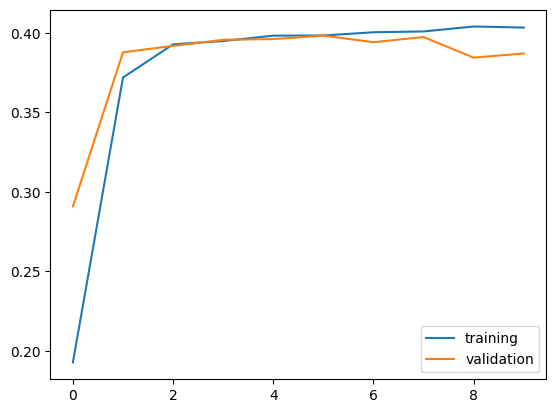

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [124]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2432 - accuracy: 0.3944


[0.24323923885822296, 0.3944000005722046]

In [125]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2445 - accuracy: 0.3904


[0.24451065063476562, 0.3903999924659729]

# 4. Batch Normalization

In [126]:
model = Sequential()

In [127]:
model.add(Dense(32, input_shape = (X_train.shape[1],),activation = 'elu'))
model.add(BatchNormalization())
model.add(Dense(16,  activation = 'elu'))
model.add(BatchNormalization())
model.add(Dense(8 ,activation = 'elu'))
model.add(BatchNormalization())
model.add(Dense(4 ,activation = 'elu'))
model.add(BatchNormalization())
model.add(Dense(2 ,activation = 'elu'))
model.add(BatchNormalization())
model.add(Dense(10 ,activation = 'softmax'))

In [128]:
optim = Adam()
model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [129]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_61 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_62 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)               

In [130]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 10, verbose = 2, validation_split = 0.4)

Epoch 1/10
3600/3600 - 33s - loss: 0.3313 - accuracy: 0.2368 - val_loss: 0.2521 - val_accuracy: 0.3314 - 33s/epoch - 9ms/step
Epoch 2/10
3600/3600 - 28s - loss: 0.2609 - accuracy: 0.3258 - val_loss: 0.2335 - val_accuracy: 0.4224 - 28s/epoch - 8ms/step
Epoch 3/10
3600/3600 - 27s - loss: 0.2534 - accuracy: 0.3602 - val_loss: 0.2271 - val_accuracy: 0.4947 - 27s/epoch - 8ms/step
Epoch 4/10
3600/3600 - 28s - loss: 0.2463 - accuracy: 0.3923 - val_loss: 0.2188 - val_accuracy: 0.5666 - 28s/epoch - 8ms/step
Epoch 5/10
3600/3600 - 31s - loss: 0.2426 - accuracy: 0.4249 - val_loss: 0.2185 - val_accuracy: 0.6065 - 31s/epoch - 9ms/step
Epoch 6/10
3600/3600 - 29s - loss: 0.2370 - accuracy: 0.4796 - val_loss: 0.2067 - val_accuracy: 0.6812 - 29s/epoch - 8ms/step
Epoch 7/10
3600/3600 - 28s - loss: 0.2286 - accuracy: 0.5374 - val_loss: 0.1964 - val_accuracy: 0.6947 - 28s/epoch - 8ms/step
Epoch 8/10
3600/3600 - 24s - loss: 0.2214 - accuracy: 0.5678 - val_loss: 0.1879 - val_accuracy: 0.7546 - 24s/epoch - 7

In [136]:
history.history

{'loss': [0.33125004172325134,
  0.2608734369277954,
  0.25339508056640625,
  0.24629801511764526,
  0.2426210194826126,
  0.23701722919940948,
  0.22859953343868256,
  0.2213612198829651,
  0.2153516411781311,
  0.21115684509277344],
 'accuracy': [0.23677778244018555,
  0.3257777690887451,
  0.36024999618530273,
  0.39233332872390747,
  0.42491665482521057,
  0.4796110987663269,
  0.5374166369438171,
  0.5678333044052124,
  0.5928611159324646,
  0.6084444522857666],
 'val_loss': [0.2521446645259857,
  0.23354607820510864,
  0.22705240547657013,
  0.21875664591789246,
  0.21851325035095215,
  0.20673510432243347,
  0.1963827759027481,
  0.18792550265789032,
  0.18151716887950897,
  0.18056628108024597],
 'val_accuracy': [0.33141666650772095,
  0.42241665720939636,
  0.4947083294391632,
  0.5666249990463257,
  0.6065416932106018,
  0.6812083125114441,
  0.6947083473205566,
  0.7545833587646484,
  0.7536666393280029,
  0.7485833168029785]}

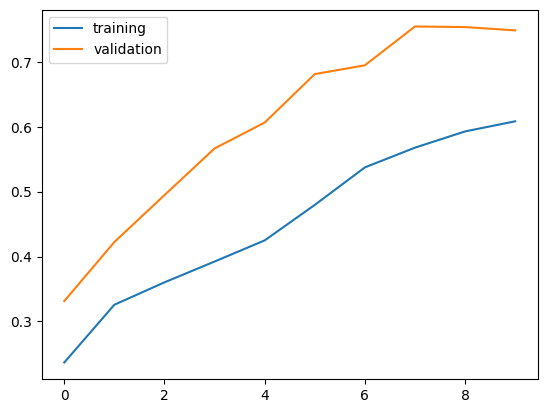

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [133]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.1793 - accuracy: 0.7522


[0.1792927235364914, 0.7521833181381226]

In [134]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1793 - accuracy: 0.7479


[0.17926299571990967, 0.7479000091552734]

# 5. Dropout

In [138]:
model = Sequential()

In [139]:
model.add(Dense(32, input_shape = (X_train.shape[1],),activation = 'elu'))
model.add(Dropout(0.2))
model.add(Dense(16,  activation = 'elu'))
model.add(Dropout(0.2))
model.add(Dense(8 ,activation = 'elu'))
model.add(Dropout(0.2))
model.add(Dense(4 ,activation = 'elu'))
model.add(Dropout(0.2))
model.add(Dense(2 ,activation = 'elu'))
model.add(Dropout(0.2))
model.add(Dense(10 ,activation = 'softmax'))

In [140]:
optim = Adam()
model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [141]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_67 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_68 (Dense)            (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_69 (Dense)            (None, 4)               

In [142]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 10, verbose = 2, validation_split = 0.4)

Epoch 1/10
3600/3600 - 20s - loss: 0.3752 - accuracy: 0.1359 - val_loss: 0.3031 - val_accuracy: 0.1982 - 20s/epoch - 5ms/step
Epoch 2/10
3600/3600 - 17s - loss: 0.3113 - accuracy: 0.1890 - val_loss: 0.2892 - val_accuracy: 0.2384 - 17s/epoch - 5ms/step
Epoch 3/10
3600/3600 - 18s - loss: 0.2975 - accuracy: 0.2329 - val_loss: 0.2716 - val_accuracy: 0.3024 - 18s/epoch - 5ms/step
Epoch 4/10
3600/3600 - 16s - loss: 0.2882 - accuracy: 0.2567 - val_loss: 0.2668 - val_accuracy: 0.3282 - 16s/epoch - 5ms/step
Epoch 5/10
3600/3600 - 17s - loss: 0.2845 - accuracy: 0.2582 - val_loss: 0.2663 - val_accuracy: 0.3011 - 17s/epoch - 5ms/step
Epoch 6/10
3600/3600 - 17s - loss: 0.2819 - accuracy: 0.2586 - val_loss: 0.2637 - val_accuracy: 0.2947 - 17s/epoch - 5ms/step
Epoch 7/10
3600/3600 - 17s - loss: 0.2812 - accuracy: 0.2624 - val_loss: 0.2642 - val_accuracy: 0.3002 - 17s/epoch - 5ms/step
Epoch 8/10
3600/3600 - 16s - loss: 0.2719 - accuracy: 0.2985 - val_loss: 0.2406 - val_accuracy: 0.3892 - 16s/epoch - 5

In [147]:
history.history

{'loss': [0.37524276971817017,
  0.311252236366272,
  0.2975336015224457,
  0.2882244884967804,
  0.2845267653465271,
  0.2819388210773468,
  0.2812027037143707,
  0.2719232738018036,
  0.2627922594547272,
  0.25951966643333435],
 'accuracy': [0.1358611136674881,
  0.18897221982479095,
  0.23294444382190704,
  0.2566944360733032,
  0.25816667079925537,
  0.2586388885974884,
  0.2624444365501404,
  0.29847222566604614,
  0.31708332896232605,
  0.32483333349227905],
 'val_loss': [0.30313432216644287,
  0.28918278217315674,
  0.27164915204048157,
  0.26680320501327515,
  0.2662701904773712,
  0.2636599838733673,
  0.26420819759368896,
  0.24060754477977753,
  0.23565416038036346,
  0.236811101436615],
 'val_accuracy': [0.19824999570846558,
  0.2383749932050705,
  0.3024166524410248,
  0.328208327293396,
  0.3010833263397217,
  0.29470834136009216,
  0.30024999380111694,
  0.3892083466053009,
  0.41229167580604553,
  0.38854166865348816]}

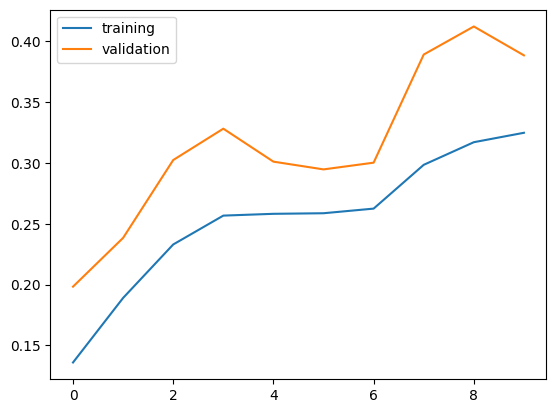

In [148]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [149]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2356 - accuracy: 0.3901


[0.23555207252502441, 0.3901166617870331]

In [150]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.3916


[0.2358960211277008, 0.39160001277923584]

# 5. Consolidated Architechture

In [156]:
model = Sequential()

In [157]:
model.add(Dense(32, kernel_initializer = 'he_normal', input_shape = (X_train.shape[1],),activation = 'elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer = 'he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8 ,kernel_initializer = 'he_normal',activation = 'elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4 ,kernel_initializer = 'he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2 ,kernel_initializer = 'he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10 ,kernel_initializer = 'he_normal', activation = 'softmax'))

In [158]:
optim = Adam()
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [159]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization_10 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_79 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_11 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dropout_11 (Dropout)        (None, 16)              

In [179]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 10, verbose = 2, validation_split = 0.4)

Epoch 1/10
3600/3600 - 25s - loss: 1.5402 - accuracy: 0.4072 - val_loss: 1.0047 - val_accuracy: 0.8040 - 25s/epoch - 7ms/step
Epoch 2/10
3600/3600 - 25s - loss: 1.5401 - accuracy: 0.4086 - val_loss: 1.0217 - val_accuracy: 0.8085 - 25s/epoch - 7ms/step
Epoch 3/10
3600/3600 - 25s - loss: 1.5346 - accuracy: 0.4126 - val_loss: 1.0431 - val_accuracy: 0.7790 - 25s/epoch - 7ms/step
Epoch 4/10
3600/3600 - 26s - loss: 1.5203 - accuracy: 0.4151 - val_loss: 0.9969 - val_accuracy: 0.7896 - 26s/epoch - 7ms/step
Epoch 5/10
3600/3600 - 25s - loss: 1.5126 - accuracy: 0.4207 - val_loss: 1.0023 - val_accuracy: 0.8022 - 25s/epoch - 7ms/step
Epoch 6/10
3600/3600 - 42s - loss: 1.5162 - accuracy: 0.4158 - val_loss: 1.0509 - val_accuracy: 0.7860 - 42s/epoch - 12ms/step
Epoch 7/10
3600/3600 - 28s - loss: 1.4954 - accuracy: 0.4198 - val_loss: 1.0524 - val_accuracy: 0.7970 - 28s/epoch - 8ms/step
Epoch 8/10
3600/3600 - 27s - loss: 1.5002 - accuracy: 0.4220 - val_loss: 1.0252 - val_accuracy: 0.8020 - 27s/epoch - 

In [180]:
history.history

{'loss': [1.540231704711914,
  1.540112018585205,
  1.534611701965332,
  1.5202970504760742,
  1.5125908851623535,
  1.5162456035614014,
  1.4953837394714355,
  1.5001895427703857,
  1.4909981489181519,
  1.4886105060577393],
 'accuracy': [0.40716665983200073,
  0.40861111879348755,
  0.4125555455684662,
  0.4150555431842804,
  0.4206666648387909,
  0.4157777726650238,
  0.41983333230018616,
  0.421999990940094,
  0.4252777695655823,
  0.42419445514678955],
 'val_loss': [1.0046864748001099,
  1.02167809009552,
  1.0431479215621948,
  0.9969482421875,
  1.0022913217544556,
  1.050926685333252,
  1.052446961402893,
  1.0251924991607666,
  1.0712690353393555,
  1.071803092956543],
 'val_accuracy': [0.8040000200271606,
  0.8084583282470703,
  0.7789999842643738,
  0.7895833253860474,
  0.8021666407585144,
  0.7860416769981384,
  0.796958327293396,
  0.8020416498184204,
  0.7475416660308838,
  0.7644583582878113]}

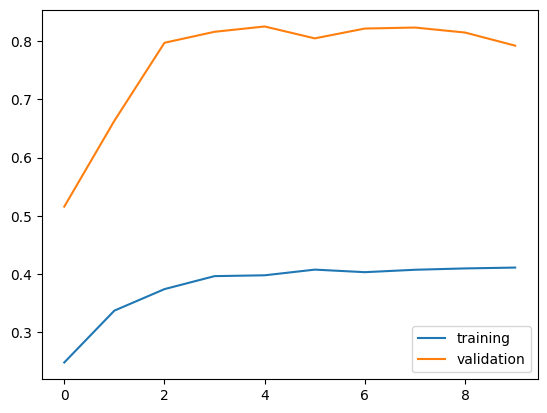

In [162]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

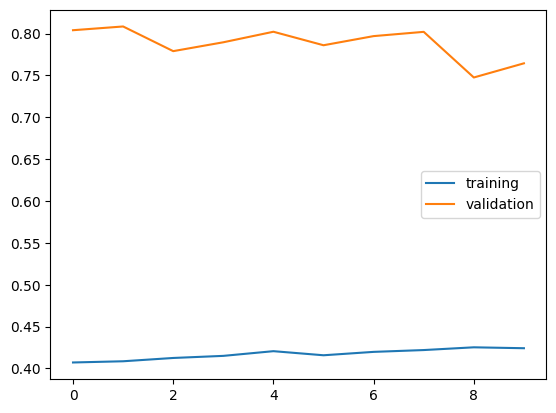

In [181]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [182]:
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 1.0590 - accuracy: 0.7689


[1.0589962005615234, 0.7689499855041504]

In [183]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0527 - accuracy: 0.7652


[1.052701473236084, 0.7652000188827515]

In [184]:
model.get_weights()

[array([[ 0.0566983 ,  0.04238607,  0.01466978, ..., -0.07548036,
         -0.01820346, -0.02901771],
        [-0.0155519 ,  0.01029312, -0.00114875, ...,  0.04501508,
          0.02343347, -0.11262857],
        [-0.07429361,  0.06909569,  0.03897437, ..., -0.0485761 ,
          0.04282059,  0.03840249],
        ...,
        [-0.00847867,  0.01822461, -0.00164912, ..., -0.02579606,
          0.01501761,  0.03776801],
        [ 0.01529966, -0.00926232,  0.06676662, ...,  0.0279997 ,
          0.05511592, -0.09164606],
        [ 0.01127373, -0.05899547,  0.0179991 , ...,  0.03863312,
         -0.02238048, -0.02034775]], dtype=float32),
 array([-0.02202057,  0.02631227,  0.06324732, -0.30465674,  0.731933  ,
         0.03947731, -0.60770935, -0.06461781,  0.7836849 , -0.01956519,
        -0.12621772,  0.33959413,  0.08560267, -0.16740528, -0.17693159,
        -0.04943925,  0.1368964 ,  0.5469944 ,  0.46644565,  0.02960907,
        -0.05627716,  0.39369598,  0.17080805, -0.01311764,  0.087

In [170]:
model.save('consolidated_model.pkl')

In [171]:
from keras.saving import load_model

In [172]:
model_loaded =  load_model('consolidated_model.pkl')

In [173]:
model_loaded.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization_10 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_79 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_11 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dropout_11 (Dropout)        (None, 16)              

In [176]:
np.argmax(model_loaded.predict(X_test)[0])

313/313 [==============================] - 1s 3ms/step


7

In [185]:
y_test[0]

7

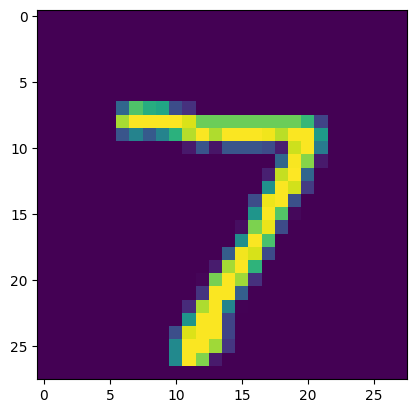

In [178]:
plt.imshow(x_test[0])

In [188]:
test_pred = np.argmax(model_loaded.predict(X_test), axis = 1)

313/313 [==============================] - 2s 6ms/step


In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [193]:
cnf = confusion_matrix(y_test,test_pred)

In [192]:
accuracy_score(y_test,test_pred)

0.7896

<Axes: >

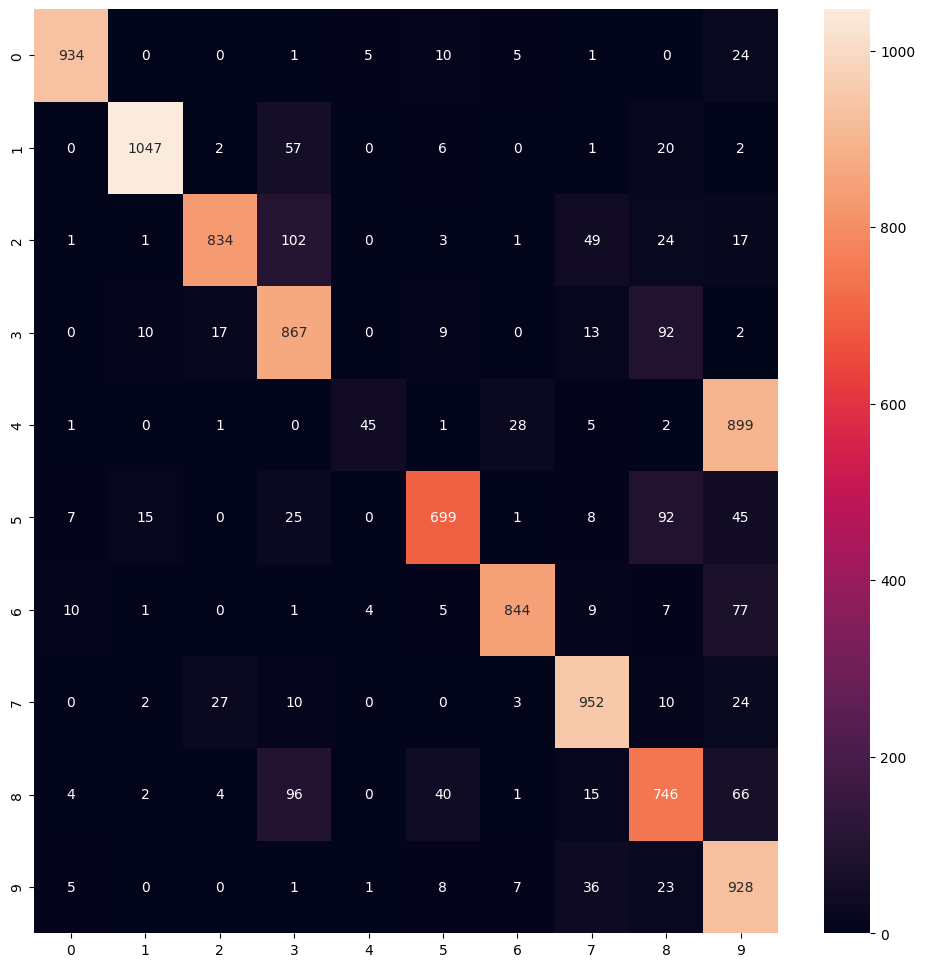

In [210]:
import seaborn as sns
plt.figure(figsize = (12,12))
sns.heatmap(cnf, annot=True, fmt='g')

<Axes: >

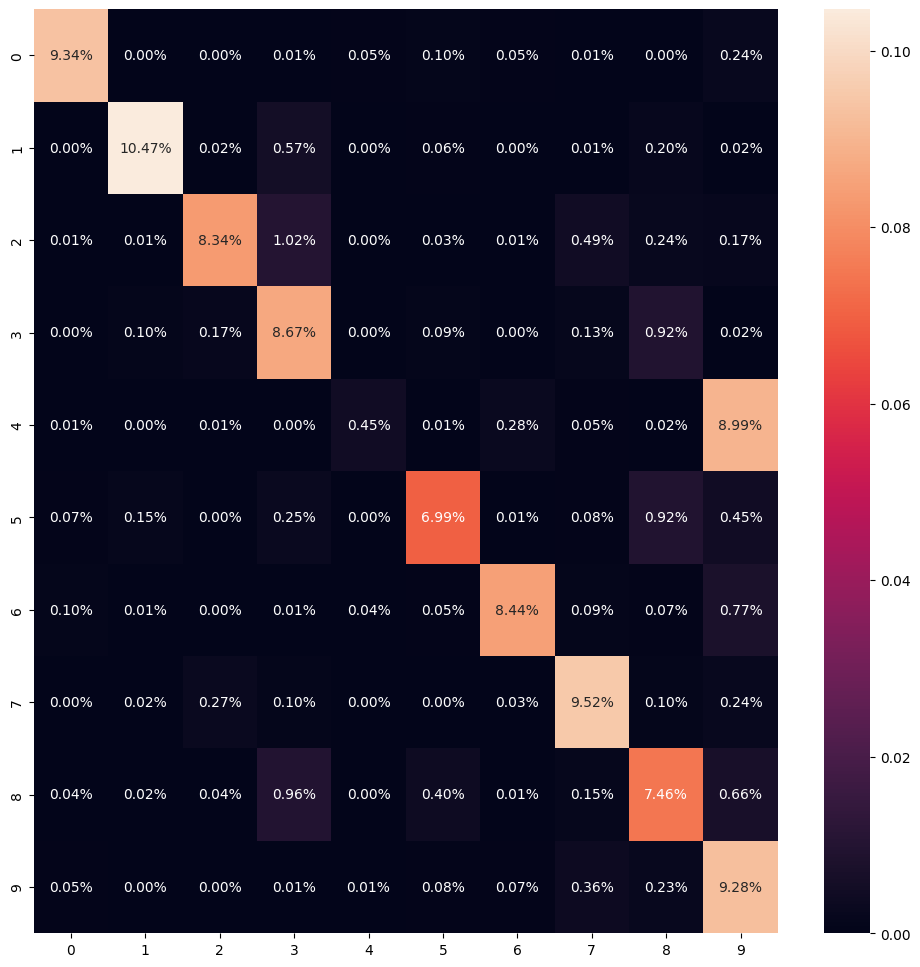

In [207]:
plt.figure(figsize = (12,12))
sns.heatmap(cnf/np.sum(cnf), annot=True, fmt = '.2%')
